In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df=pd.read_csv('Traffic data.csv')

In [4]:
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [6]:
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [8]:
df['Datetime']=pd.to_datetime(df['Datetime'],format='%d-%m-%Y %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


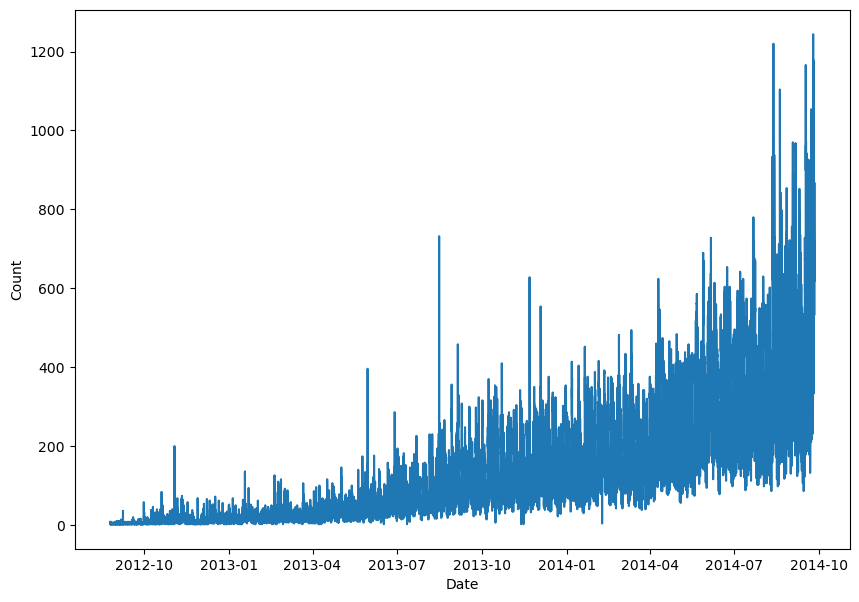

In [10]:
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'],df['Count'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [11]:
df.index=df['Datetime']
df['y']=df['Count']
df.drop(columns=['ID','Datetime','Count'],axis=1,inplace=True)
df=df.resample('D').sum()

In [12]:
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [13]:
df['ds']=df.index

In [14]:
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


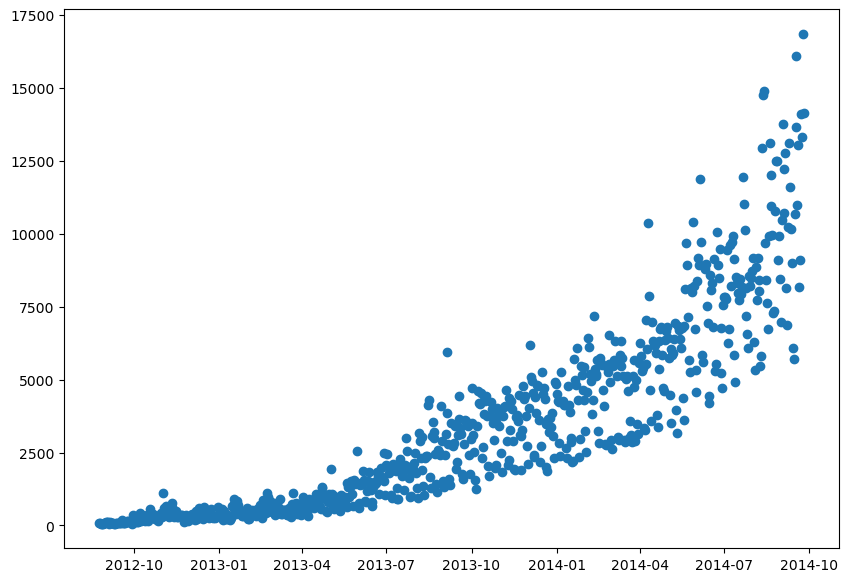

In [36]:
plt.figure(figsize=(10,7))
plt.scatter(df['ds'], df['y'])

In [56]:
size=50
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=size/len(df),shuffle=False)

In [42]:
train.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


In [48]:
train.tail()

,y,ds
Datetime,,
2014-08-02,6278,2014-08-02
2014-08-03,5340,2014-08-03
2014-08-04,8872,2014-08-04
2014-08-05,7724,2014-08-05
2014-08-06,9170,2014-08-06


In [50]:
test.head()

,y,ds
Datetime,,
2014-08-07,8036,2014-08-07
2014-08-08,8406,2014-08-08
2014-08-09,5462,2014-08-09
2014-08-10,5822,2014-08-10
2014-08-11,12928,2014-08-11


In [52]:
test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


In [74]:
# Initialize the model with your settings
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

08:56:38 - cmdstanpy - INFO - Chain [1] start processing
08:56:38 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
# Make a future dataframe for predictions
future = model.make_future_dataframe(periods=50)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [84]:
# Predict
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-519.582908,-1832.761663,113.740595,-519.582908,-519.582908,-328.389712,-328.389712,-328.389712,-852.056162,-852.056162,-852.056162,523.666450,523.666450,523.666450,0.0,0.0,0.0,-847.972619
1,2012-08-26,-512.338860,-1951.058865,79.858657,-512.338860,-512.338860,-446.072479,-446.072479,-446.072479,-981.079673,-981.079673,-981.079673,535.007194,535.007194,535.007194,0.0,0.0,0.0,-958.411339
2,2012-08-27,-505.094812,-426.983305,1397.026697,-505.094812,-505.094812,979.424213,979.424213,979.424213,435.793899,435.793899,435.793899,543.630314,543.630314,543.630314,0.0,0.0,0.0,474.329400
3,2012-08-28,-497.850765,-442.983154,1411.189646,-497.850765,-497.850765,978.851126,978.851126,978.851126,429.197943,429.197943,429.197943,549.653183,549.653183,549.653183,0.0,0.0,0.0,481.000361
4,2012-08-29,-490.606717,-453.008040,1423.525728,-490.606717,-490.606717,959.945706,959.945706,959.945706,406.719535,406.719535,406.719535,553.226171,553.226171,553.226171,0.0,0.0,0.0,469.338989


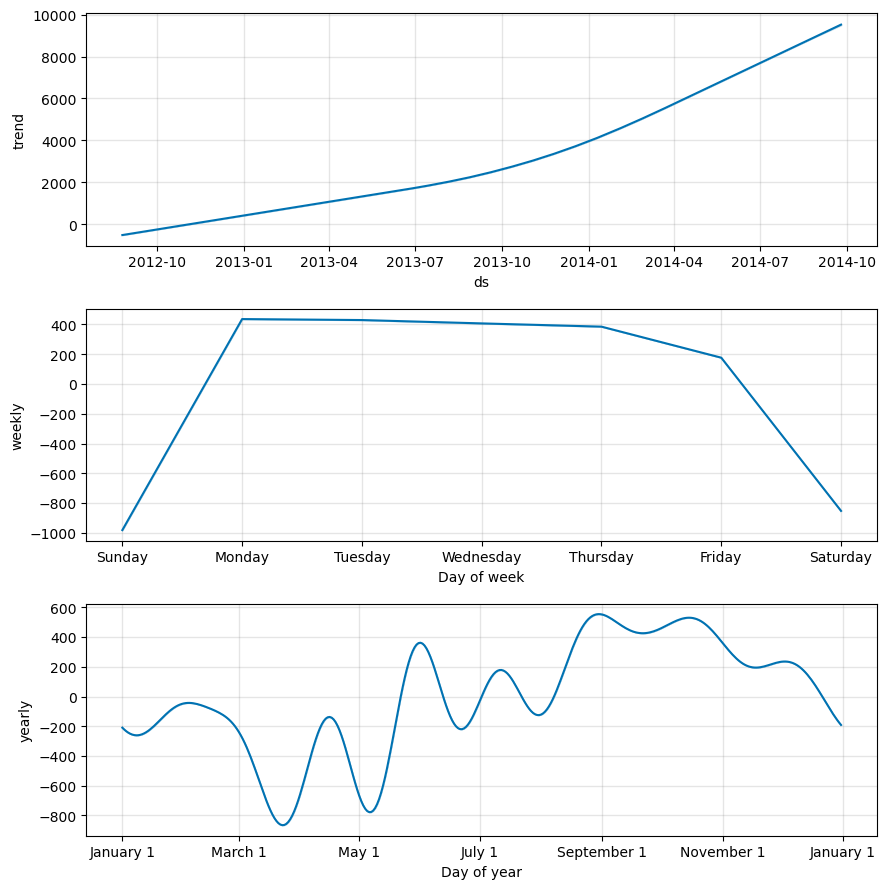

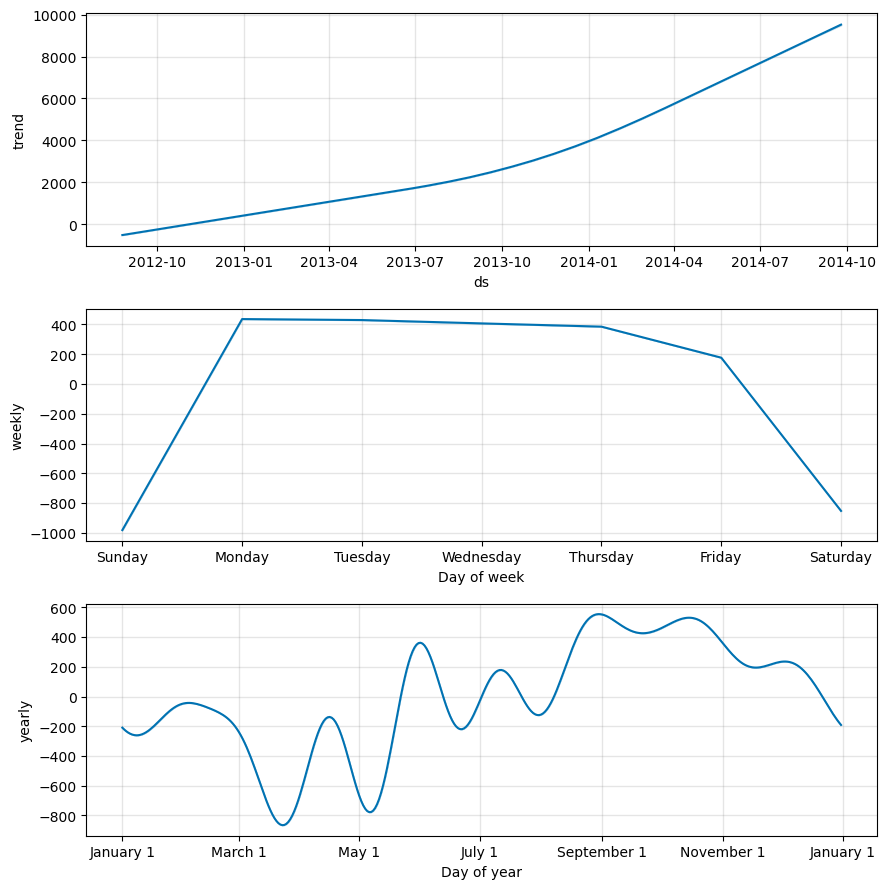

In [91]:
model.plot_components(forecast)

In [137]:
pred=forecast.iloc[-50:,:]
len(pred)

50

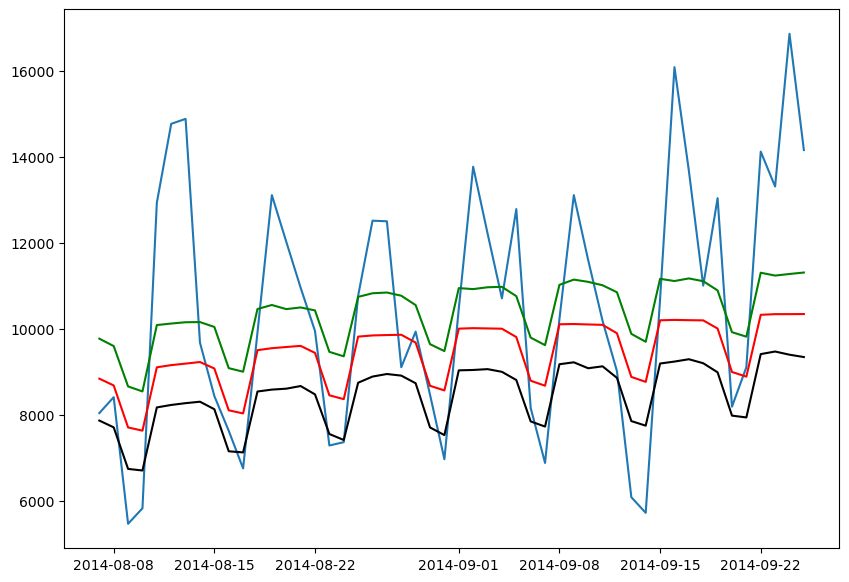

In [139]:
#test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'],test['y'])
plt.plot(pred['ds'],pred['yhat'],color='red')
plt.plot(pred['ds'],pred['yhat_lower'],color='black')
plt.plot(pred['ds'],pred['yhat_upper'],color='green')
plt.show()

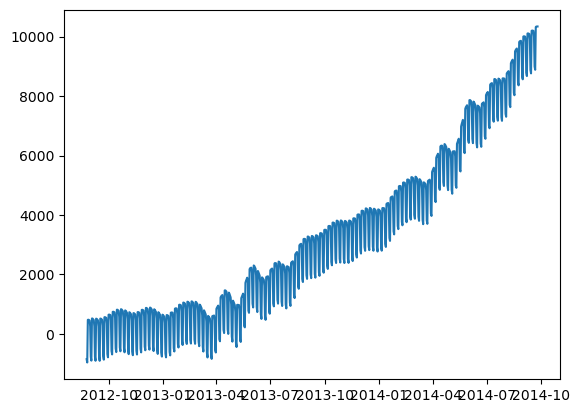

In [141]:
#forecast data
plt.plot(forecast['ds'],forecast['yhat'])
plt.show()

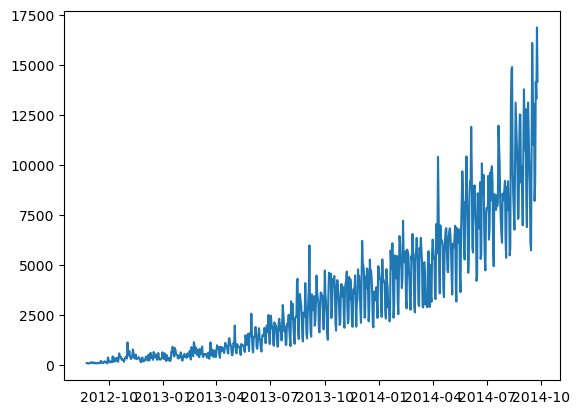

In [147]:
#input data
plt.plot(df['ds'],df['y'])
plt.show()

In [161]:
model=Prophet(yearly_seasonality=True,seasonality_prior_scale=0.9)
model.fit(df)
future=model.make_future_dataframe(periods=50)
forecast=model.predict(future)

10:44:34 - cmdstanpy - INFO - Chain [1] start processing
10:44:35 - cmdstanpy - INFO - Chain [1] done processing


In [159]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-675.686245,-2306.837772,99.261661,-675.686245,-675.686245,-421.099859,-421.099859,-421.099859,-995.243742,-995.243742,-995.243742,574.143883,574.143883,574.143883,0.0,0.0,0.0,-1096.786104
1,2012-08-26,-667.632754,-2484.721371,-83.955369,-667.632754,-667.632754,-579.384441,-579.384441,-579.384441,-1144.284982,-1144.284982,-1144.284982,564.900540,564.900540,564.900540,0.0,0.0,0.0,-1247.017195
2,2012-08-27,-659.579263,-759.615105,1522.786457,-659.579263,-659.579263,1010.382290,1010.382290,1010.382290,457.571859,457.571859,457.571859,552.810431,552.810431,552.810431,0.0,0.0,0.0,350.803028
3,2012-08-28,-651.525771,-664.883106,1716.392299,-651.525771,-651.525771,1147.071551,1147.071551,1147.071551,608.384490,608.384490,608.384490,538.687061,538.687061,538.687061,0.0,0.0,0.0,495.545780
4,2012-08-29,-643.472280,-796.757838,1625.763182,-643.472280,-643.472280,1080.315244,1080.315244,1080.315244,556.952833,556.952833,556.952833,523.362411,523.362411,523.362411,0.0,0.0,0.0,436.842964
